In [10]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the requests library
import requests
# Import the API key
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000,high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000,high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [12]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [13]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

606

In [14]:
# Create an empty list to hold the weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# create counters
record_count = 1
set_count = 1
# Loop through all the cities in the list
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # create endpoint URL with each city
    #city_url = url + "&q=" + city.replace("","+"), if there is no space between "", nothing will be replaced
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count})|{city}")
    # Add 1 to the record count
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1)|kapaa
Processing Record 2 of Set 1)|anadyr
Processing Record 3 of Set 1)|jaciara
Processing Record 4 of Set 1)|ushuaia
Processing Record 5 of Set 1)|hasaki
Processing Record 6 of Set 1)|jamestown
Processing Record 7 of Set 1)|khatanga
Processing Record 8 of Set 1)|narsaq
Processing Record 9 of Set 1)|port alfred
Processing Record 10 of Set 1)|limbang
Processing Record 11 of Set 1)|ikot ekpene
Processing Record 12 of Set 1)|tiksi
Processing Record 13 of Set 1)|illoqqortoormiut
City not found. Skipping...
Processing Record 14 of Set 1)|kailua
Processing Record 15 of Set 1)|busselton
Processing Record 16 of Set 1)|maddela
Processing Record 17 of Set 1)|nikolskoye
Processing Record 18 of Set 1)|albany
Processing Record 19 of Set 1)|rikitea
Processing Record 20 of Set 1)|huaihua
Processing Record 21 of Set 1)|dzerzhinsk
Processing Record 22 of Set 1)|bluff
Processing Record 23 of Set 1)|hilo
Processing

Processing Record 40 of Set 4)|manaure
Processing Record 41 of Set 4)|severo-kurilsk
Processing Record 42 of Set 4)|rungata
City not found. Skipping...
Processing Record 43 of Set 4)|kotelnikovo
Processing Record 44 of Set 4)|carmen
Processing Record 45 of Set 4)|killarney
Processing Record 46 of Set 4)|muravlenko
Processing Record 47 of Set 4)|houma
Processing Record 48 of Set 4)|wilmington
Processing Record 49 of Set 4)|kargasok
Processing Record 50 of Set 4)|husyatyn
Processing Record 1 of Set 5)|hualmay
Processing Record 2 of Set 5)|biloela
Processing Record 3 of Set 5)|ituni
City not found. Skipping...
Processing Record 4 of Set 5)|genhe
Processing Record 5 of Set 5)|sapa
Processing Record 6 of Set 5)|hue
Processing Record 7 of Set 5)|pitimbu
Processing Record 8 of Set 5)|wahran
City not found. Skipping...
Processing Record 9 of Set 5)|tasiilaq
Processing Record 10 of Set 5)|kysyl-syr
Processing Record 11 of Set 5)|hofn
Processing Record 12 of Set 5)|alihe
Processing Record 13 of 

Processing Record 38 of Set 8)|severo-yeniseyskiy
Processing Record 39 of Set 8)|kefar shemaryahu
Processing Record 40 of Set 8)|yako
Processing Record 41 of Set 8)|varkaus
Processing Record 42 of Set 8)|puerto quijarro
Processing Record 43 of Set 8)|bardiyah
Processing Record 44 of Set 8)|misratah
Processing Record 45 of Set 8)|imbituba
Processing Record 46 of Set 8)|siquirres
Processing Record 47 of Set 8)|nanortalik
Processing Record 48 of Set 8)|luce
Processing Record 49 of Set 8)|burnie
Processing Record 50 of Set 8)|changji
Processing Record 1 of Set 9)|filadelfia
Processing Record 2 of Set 9)|ilulissat
Processing Record 3 of Set 9)|vilyuysk
Processing Record 4 of Set 9)|aitape
Processing Record 5 of Set 9)|tanete
Processing Record 6 of Set 9)|port macquarie
Processing Record 7 of Set 9)|alotau
City not found. Skipping...
Processing Record 8 of Set 9)|kiunga
Processing Record 9 of Set 9)|mesyagutovo
Processing Record 10 of Set 9)|bambous virieux
Processing Record 11 of Set 9)|vic

Processing Record 31 of Set 12)|taoudenni
Processing Record 32 of Set 12)|nizhnyaya tavda
Processing Record 33 of Set 12)|dwarka
Processing Record 34 of Set 12)|meulaboh
Processing Record 35 of Set 12)|nanpara
Processing Record 36 of Set 12)|nguruka
Processing Record 37 of Set 12)|bennington
Processing Record 38 of Set 12)|luderitz
Processing Record 39 of Set 12)|dinar
Processing Record 40 of Set 12)|codrington
Processing Record 41 of Set 12)|udomlya
Processing Record 42 of Set 12)|yinchuan
Processing Record 43 of Set 12)|lively
Processing Record 44 of Set 12)|palauig
Processing Record 45 of Set 12)|mafinga
Processing Record 46 of Set 12)|whitehorse
Processing Record 47 of Set 12)|bang saphan
Processing Record 48 of Set 12)|dandong
Processing Record 49 of Set 12)|rio gallegos
Processing Record 50 of Set 12)|kondagaon
Processing Record 1 of Set 13)|teya
Processing Record 2 of Set 13)|korla
Processing Record 3 of Set 13)|mnogovershinnyy
Processing Record 4 of Set 13)|ketchikan
Processing

In [15]:
len(city_data)

563

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,73.40,73,75,12.66,US,2021-04-02 17:54:24
1,Anadyr,64.7500,177.4833,6.80,85,75,22.37,RU,2021-04-02 17:56:54
2,Jaciara,-15.9653,-54.9683,92.21,41,68,1.90,BR,2021-04-02 17:56:54
3,Ushuaia,-54.8000,-68.3000,50.00,71,20,17.27,AR,2021-04-02 17:56:54
4,Hasaki,35.7333,140.8333,53.60,76,75,8.05,JP,2021-04-02 17:56:54
5,Jamestown,42.0970,-79.2353,33.01,40,1,12.66,US,2021-04-02 17:56:55
6,Khatanga,71.9667,102.5000,-31.85,98,5,4.94,RU,2021-04-02 17:56:55
7,Narsaq,60.9167,-46.0500,41.00,65,75,3.44,GL,2021-04-02 17:54:36
8,Port Alfred,-33.5906,26.8910,63.05,80,100,14.97,ZA,2021-04-02 17:56:55
9,Limbang,4.7500,115.0000,78.80,94,75,2.30,MY,2021-04-02 17:56:56


In [17]:
# reorder the columns
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2021-04-02 17:54:24,22.0752,-159.3190,73.40,73,75,12.66
1,Anadyr,RU,2021-04-02 17:56:54,64.7500,177.4833,6.80,85,75,22.37
2,Jaciara,BR,2021-04-02 17:56:54,-15.9653,-54.9683,92.21,41,68,1.90
3,Ushuaia,AR,2021-04-02 17:56:54,-54.8000,-68.3000,50.00,71,20,17.27
4,Hasaki,JP,2021-04-02 17:56:54,35.7333,140.8333,53.60,76,75,8.05


In [18]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

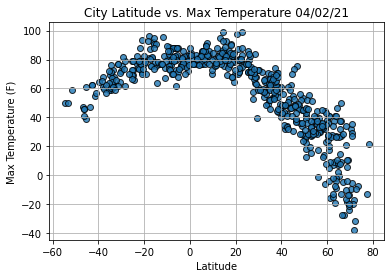

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1,marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()


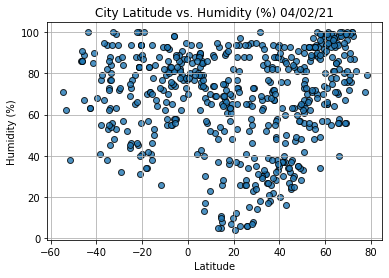

In [24]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1,marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()


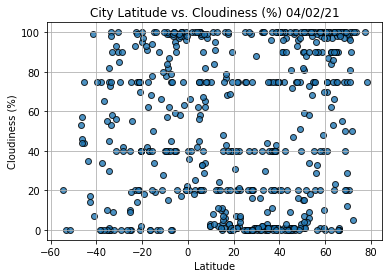

In [25]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1,marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

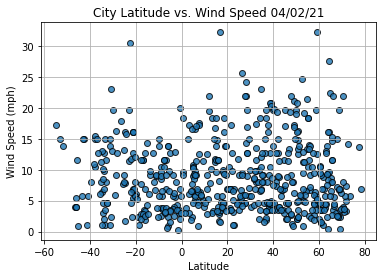

In [26]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1,marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()

In [27]:
# x value = independent variable
# y value = dependent variable

In [28]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perfrom linear regression on the weather data
# and plot a regressio line and the equation with the data

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y_values" from the slope and intercept
    regress_values = x_values * slope + intercept
    # Get the equation of the line
    line_eq = "y = "+ str(round(slope,2))+"x + "+str(round(intercept,2))
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values,"r")
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

In [33]:
# Create Northern and Sourthern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<0)]

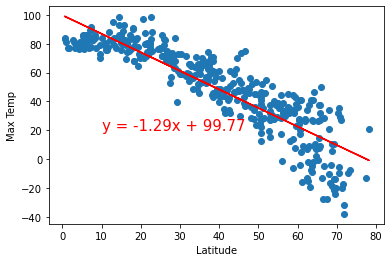

In [34]:
# Linear regression on the Northern Hemisphere max temperature
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature','Max Temp',(10,20))

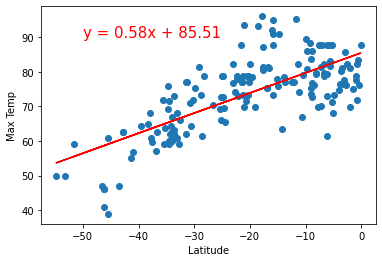

In [39]:
# Linear regression on the Southern Hemisphere max temperature
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature','Max Temp',(-50,90))

#### Finding
The correlation between the latitude and the maximum temperature is verty strong to strong because the r-value is -1.29 for the Northern Hemisphere and 0.58 for the Southern Hemisphere, as shown by the plots here. This means that as we approach the equator, 0° latitude, the temperatures become warmer. And when we are further from the equator the temperatures become cooler. 

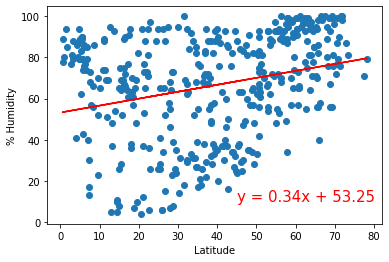

In [42]:
# Linear regression on the Northern Hemisphere humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity','% Humidity',(45,10))

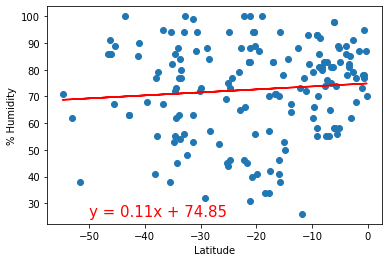

In [47]:
# Linear regression on the Southern Hemisphere humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity','% Humidity',(-50,25))

#### Finding
The correlation between the latitude and percent humidity is very low because the r-value is less than 0.5 for the Northern and Southern Hemispheres for the plots shown here. This means that percent humidity is unpredictable due to changing weather patterns that can increase or decrease percent humidity.

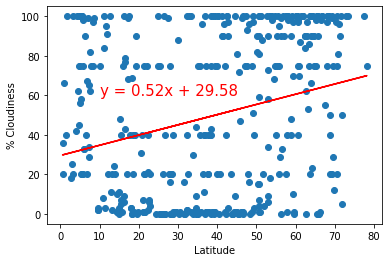

In [53]:
# Linear regression on the Northern Hemisphere % cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness','% Cloudiness',(10,60))

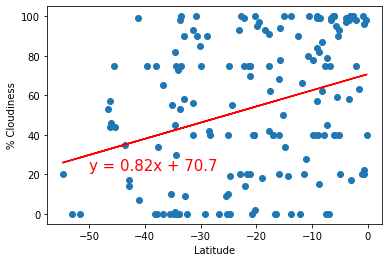

In [55]:
# Linear regression on the Southern Hemisphere % Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness','% Cloudiness',(-50,22))

#### Finding
The correlation between the latitude and percent cloudiness is strong and because the r-value is greater than 0.5 for the Northern and Southern Hemispheres. This means the percentage cloudiness is increasing approching the Northern Hemisphere.

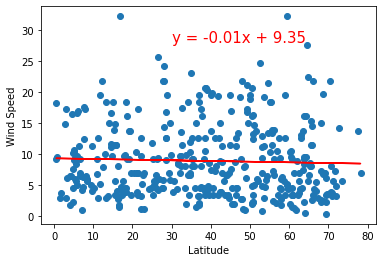

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(30,28))

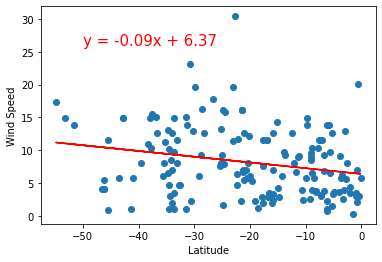

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,26))

#### Finding
The correlation between the latitude and wind speed is very low because the r-value is less  than –0.02 for the Northern Hemisphere and less than –0.1 for the Southern Hemisphere for the plots shown here. This means that wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed.